In [29]:
import os
import math
import numpy as np
import functools
import operator
import nltk
from nltk import pos_tag
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [37]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/samanu/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     /home/samanu/nltk_data...
[nltk_data]    |

True

In [3]:
from IPython.display import clear_output

def show_progress_bar(current_value, max_value, bar_length = 100):
    # compute bar properties
    ratio = current_value / max_value
    current_bar_length = int(ratio * bar_length)
    
    # compute bar
    current_bar_array = [' '] * bar_length
    for i in range(0, current_bar_length):
        current_bar_array[i] = '#'
    bar_string = functools.reduce(operator.add, current_bar_array)
    
    # print bar
    clear_output(wait = True)
    print("[{}] {}%".format(bar_string, int(ratio * 100)))

In [4]:
ARTICLES_PATH = 'BBC News Summary/News Articles'
SUMMARIES_PATH = 'BBC News Summary/Summaries'

In [5]:
ARTICLE='article'
SUMMARY='summary'
ENCODING = 'latin1'


CLASSES = ['sport', 'entertainment', 'tech', 'politics', 'business']
TRAIN_PERCENTAGE = 0.9

data_set = dict()

# DICTIONARY INDEXES
FILE_NAME = 0
TITLE_WORDS = 1
TITLE_UNIGRAMS = 2
TITLE_BIGRAMS = 3
TITLE_FOURGRAMS = 4
FILE_SENTENCES = 5
FILE_UNIGRAMS = 6
FILE_BIGRAMS = 7
FILE_FOURGRAMS = 8
SUMMARY_TEXT = 9
SUMMARY_UNIGRAMS = 10
SUMMARY_BIGRAMS = 10
SUMMARY_FOURGRAMS = 10

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_words(initial_words):
    return list(filter(lambda x: lemmatizer.lemmatize(x), initial_words))

def filter_stop_words(initial_words):
    return list(filter(lambda x : x not in stop_words, initial_words))

def only_nouns(word_list):
    return [word for (word, tag) in pos_tag(word_list) if tag[:2] == 'NN']

In [7]:
def get_summary_text_for_article(class_name, file_name):
    summary_directory_path = os.path.join(SUMMARIES_PATH, class_name)
    summary_file_path = os.path.join(summary_directory_path, file_name)
    with open (summary_file_path, 'r', encoding = ENCODING) as file:
        return file.read()

def n_grams(text, n):
    return list(ngrams(text, n))
    
def prepare_sentence_words(sentence):
    words = word_tokenize(sentence)
    without_stop_words = filter_stop_words(words)
    nouns = only_nouns(without_stop_words)
    lemmatized = lemmatize_words(nouns)
    return lemmatized
    
def persist_article_class_file(class_name, file_name, file_path):

    with open (file_path, 'r', encoding = 'latin1') as file:
        # Title
        file_title = file.readline()

        title_words = prepare_sentence_words(file_title)
        title_unigrams = n_grams(title_words, 1)
        title_bigrams = n_grams(title_words, 2)
        title_fourgrams = n_grams(title_words, 4)
        
        file.readline()

        # Content
        file_content = file.read()
        
        file_sentences = list(map(lambda sentence : prepare_sentence_words(sentence), sent_tokenize(file_content)))
        file_unigrams = list(map(lambda sentence : n_grams(sentence, 1), file_sentences))
        file_bigrams = list(map(lambda sentence : n_grams(sentence, 2), file_sentences))
        file_fourgrams = list(map(lambda sentence : n_grams(sentence, 4), file_sentences))
        
        # Summary
        summary_text = get_summary_text_for_article(class_name, file_name)
        summary_tokens = word_tokenize(summary_text)
        summary_unigrams = n_grams(summary_tokens, 1)
        summary_bigrams = n_grams(summary_tokens, 2)
        summary_fourgrams = n_grams(summary_tokens, 4)
        
        
        # Wrapper
        new_information = (file_name, \
                           title_words, \
                           title_unigrams, \
                           title_bigrams, \
                           title_fourgrams, \
                           sent_tokenize(file_content), \
                           file_unigrams, \
                           file_bigrams, \
                           file_fourgrams, \
                           summary_text, \
                           summary_unigrams, \
                           summary_bigrams, \
                           summary_fourgrams)
    
        if class_name in data_set:
            new_value = data_set[class_name]
            new_value.append(new_information)
            data_set[class_name] = new_value
        else:
            data_set[class_name] = [new_information]

def persist_article_class(class_name, class_directory_path):
    for file_name in os.listdir(class_directory_path):
        persist_article_class_file(class_name, file_name, os.path.join(class_directory_path, file_name))

def persist_articles_information():
    for class_directory in os.listdir(ARTICLES_PATH):
        persist_article_class(class_directory, os.path.join(ARTICLES_PATH, class_directory))

In [8]:
persist_articles_information()

In [9]:
def prepare_data_for_summary():
    train_data = dict()
    test_data = dict()
    
    for class_name in data_set:
        data_array = data_set[class_name]
        total_data_length = len(data_array)
        
        cutoff_index = int(total_data_length * TRAIN_PERCENTAGE)
        
        train_data[class_name] = data_array[0: cutoff_index]
        test_data[class_name] = data_array[cutoff_index:total_data_length]    
        
    return train_data, test_data

In [10]:
train_data, test_data = prepare_data_for_summary()

In [11]:
def count_term_frequency(item, items_matrix):
    count = 0
    for i in range(0, len(items_matrix)):
        for j in range(0, len(items_matrix[i])):
            if items_matrix[i][j] == item:
                count += 1
    return count

def count_inverse_document_frequency(item, class_data, content_index):
    count = 0
    # for each document
    for article_information in class_data:
        items_matrix = article_information[content_index]
        # for each sentence
        for i in range(0, len(items_matrix)):
            
            # if found in any sentence => found in article 
            if item in items_matrix[i]:
                count+=1
                continue

    return count

def compute_tf_idf(content_index, title_index):
    N = 0
    tf_idf_model = dict()
    for class_name in CLASSES:
        tf_idf_model[class_name] = dict()
        N += len(train_data[class_name])

    index = 1
    for class_name in train_data:
        class_data = train_data[class_name]
        
        for article_information in class_data:
            show_progress_bar(index, N)
            n_gram_matrix = article_information[content_index]
            for i in range(0, len(n_gram_matrix)):
                for j in range(0, len(n_gram_matrix[i])):
                    n_gram = n_gram_matrix[i][j]
                    term_frequency = count_term_frequency(n_gram, article_information[content_index])
                    inverse_document_frequency = count_inverse_document_frequency(n_gram, class_data, content_index)

                    tf_idf = term_frequency * math.log(N / inverse_document_frequency)
                    
                    if n_gram in tf_idf_model[class_name]:
                        new_value = tf_idf_model[class_name][n_gram]
                        new_value += tf_idf
                        tf_idf_model[class_name][n_gram] = new_value
                    else:
                        tf_idf_model[class_name][n_gram] = tf_idf
                    
            index += 1
    
    return tf_idf_model

In [12]:
tf_idf_unigram_model = compute_tf_idf(FILE_UNIGRAMS, TITLE_UNIGRAMS)

[####################################################################################################] 100%


In [13]:
tf_idf_bigram_model = compute_tf_idf(FILE_BIGRAMS, TITLE_BIGRAMS)

[####################################################################################################] 100%


In [14]:
tf_idf_fourgram_model = compute_tf_idf(FILE_FOURGRAMS, TITLE_FOURGRAMS)

[####################################################################################################] 100%


In [15]:
TITLE_IMPORTANCE = 0.1
K = 3

def generate_sentence_smoother_sequence(number_of_sentences):
    SENTENCE_ORDER_LOWER_BOUND = 0.1
    SENTENCE_ORDER_UPPER_BOUND = 1
    return np.linspace(SENTENCE_ORDER_LOWER_BOUND, SENTENCE_ORDER_UPPER_BOUND, number_of_sentences)

def count_of_words_in_title(n_gram_sentence, title_n_grams):
    count = 0
    for n_gram in n_gram_sentence:
        if n_gram in title_n_grams:
            count += 1
    return count

def produce_summary_for_class(model, class_name, article_information, file_n_grams_index, title_n_grams_index):
    sentences = []
    sentences_length = len(article_information[FILE_SENTENCES])
    for i in range(0, sentences_length):
        actual_sentence = article_information[FILE_SENTENCES][i]
        n_gram_sentence = article_information[file_n_grams_index][i]
        
        sentence_score = 0
        
        # step 1 (Importance of nouns)
        nouns_score = 0
        for n_gram in n_gram_sentence:
            if n_gram in model[class_name]:
                nouns_score += model[class_name][n_gram]
        
        sentence_score = nouns_score / (len(n_gram_sentence) + 1)
        
        # step 2 (Relation with title)
        words_in_title = count_of_words_in_title(n_gram_sentence, article_information[title_n_grams_index])
        title_score = words_in_title * TITLE_IMPORTANCE
        
        sentence_score += title_score
        
        sentences.append((actual_sentence, sentence_score))
    
    # step 3 (Smoothing sentences with respect to their position in article)
    sentence_smoother = generate_sentence_smoother_sequence(sentences_length)
    for i in range(0, sentences_length):
        text, score = sentences[i] 
        new_score = score * sentence_smoother[i]
        sentences[i] = (text, new_score) 
    
    # step 4 (Fetch only the first K sentences with highest score)
    sentences.sort(reverse = True, key = lambda x : x[1])
    
    # chose upper bound
    upper_bound = K if K <= sentences_length else sentences_length 
    
    # filter out the score
    sentences_test_list = list(map(lambda x: x[0], sentences[0:upper_bound]))
    
    # concat sentences
    return functools.reduce(operator.add, sentences_test_list)
    
def produce_summary(model, file_n_grams_index, title_n_grams_index):
    results = []
    for class_name in test_data:
        class_data = test_data[class_name]
        
        for article_information in class_data:
            computed_summary = produce_summary_for_class(\
                model, class_name, article_information, file_n_grams_index, title_n_grams_index)
            results.append((class_name, article_information, computed_summary))
    return results

In [16]:
unigrams_results = produce_summary(tf_idf_unigram_model, FILE_UNIGRAMS, TITLE_UNIGRAMS)
bigrams_results = produce_summary(tf_idf_bigram_model, FILE_BIGRAMS, TITLE_FOURGRAMS)
fourgrams_results = produce_summary(tf_idf_bigram_model, FILE_BIGRAMS, TITLE_FOURGRAMS)

In [31]:
N = 1

def n_grams(text, n):
    return list(ngrams(text.split(), n))

def common(list1, list2): 
    return set(list1).intersection(list2)

def bleu_n(results, n_gram_identifier):
    total_common_grams = 0
    total_text_grams = 0
    for result in results:
        expected = n_grams(result[1][SUMMARY_TEXT], n_gram_identifier)
        actual = n_grams(result[2], n_gram_identifier)
        common_grams = common(expected, actual)
        total_common_grams += len(common_grams) 
        total_text_grams += len(actual)
        
    return total_common_grams / total_text_grams * 100

def rouge_n(results, n_gram_identifier):
    total_common_grams = 0
    total_text_grams = 0
    for result in results:
        expected = n_grams(result[1][SUMMARY_TEXT], n_gram_identifier)
        actual = n_grams(result[2], n_gram_identifier)
        common_grams = common(expected, actual)
        total_common_grams += len(common_grams) 
        total_text_grams += len(expected)
        
    return total_common_grams / total_text_grams * 100

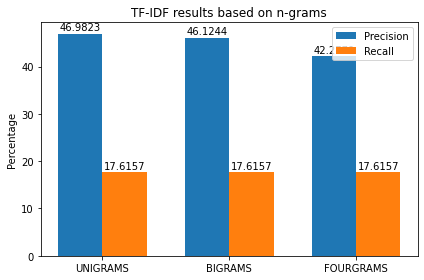

In [36]:
labels = ['UNIGRAMS', 'BIGRAMS', 'FOURGRAMS']
precision = [bleu_n(unigrams_results, 1), bleu_n(bigrams_results, 2), bleu_n(fourgrams_results, 4)]
recall = [rouge_n(unigrams_results, 1), rouge_n(unigrams_results, 1), rouge_n(unigrams_results, 1)]

# label locations
x = np.arange(len(labels))  
# bars width
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precision, width, label='Precision')
rects2 = ax.bar(x + width/2, recall, width, label='Recall')

ax.set_ylabel('Percentage')
ax.set_title('TF-IDF results based on n-grams')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

plt.show()